# Telecom Customer Churn – Data Exploration

**Objective:**  
Explore and clean the raw telecom customer churn dataset to understand patterns,
identify data quality issues, and prepare a clean dataset for feature engineering.


In [ ]:
# 1. import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [21]:
# 2. load the dataset 

DATA_PATH = "../data/raw/customer_churn.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# 3. statistical summary 

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Data Summary

- The dataset contains 3333 customer records with 21 features.
- All columns have complete data with no missing values.
- The target variable `churn` is binary, making this a classification problem.
- Numerical features primarily represent customer usage and billing behavior.
- Categorical features include service plans and geographic information.
- The `phone number` column is an identifier and will be removed.
- Charge-related features are derived from usage minutes and may cause multicollinearity.
- Feature scaling is required before training the ANN model.

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# churn distribution 

df["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [10]:
# churn percentage 
df["churn"].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

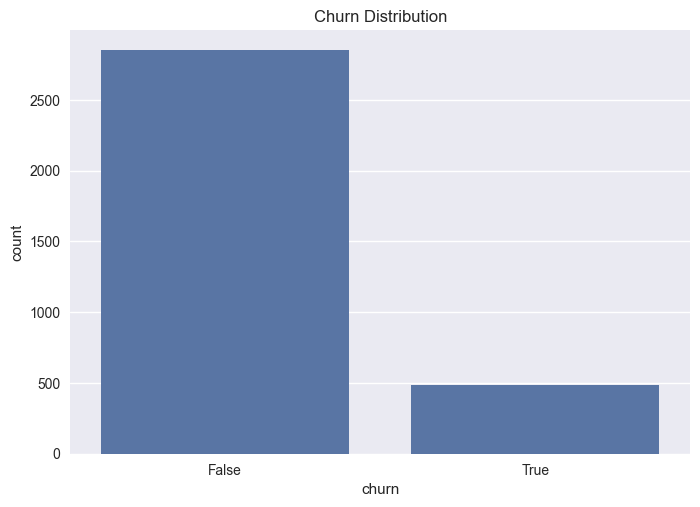

In [11]:
# visualise the distribution 

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

In [12]:
# missing value check (safety)

df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### Categorical Feature Analysis

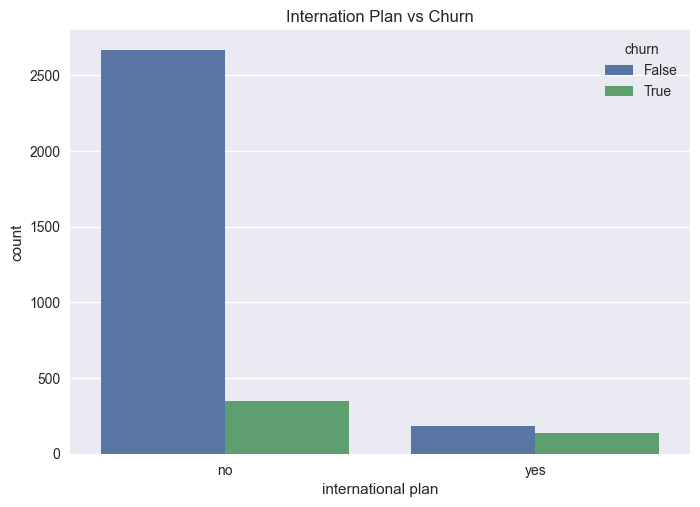

In [14]:
# International plan vs churn 

sns.countplot(x="international plan", hue='churn', data=df)
plt.title("Internation Plan vs Churn")
plt.show()

Customers with an international plan have significantly higher churn rate.

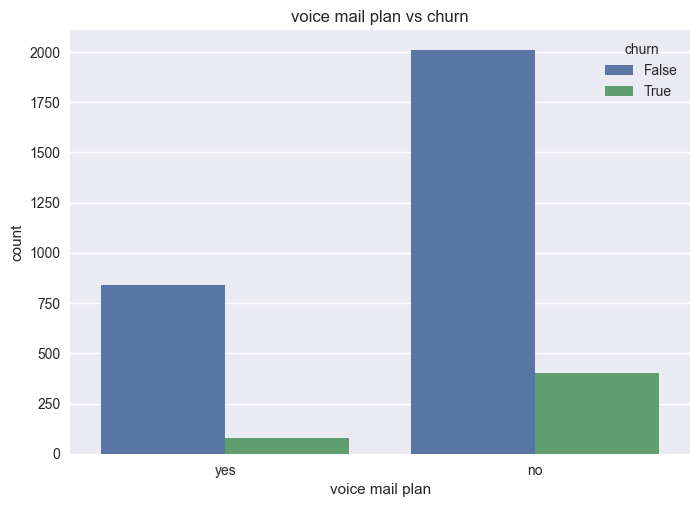

In [15]:
# voice mail plan vs churn 

sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('voice mail plan vs churn')
plt.show()

Customers with a voice mail plan are less likely to churn.

#### Numerical feature distribution

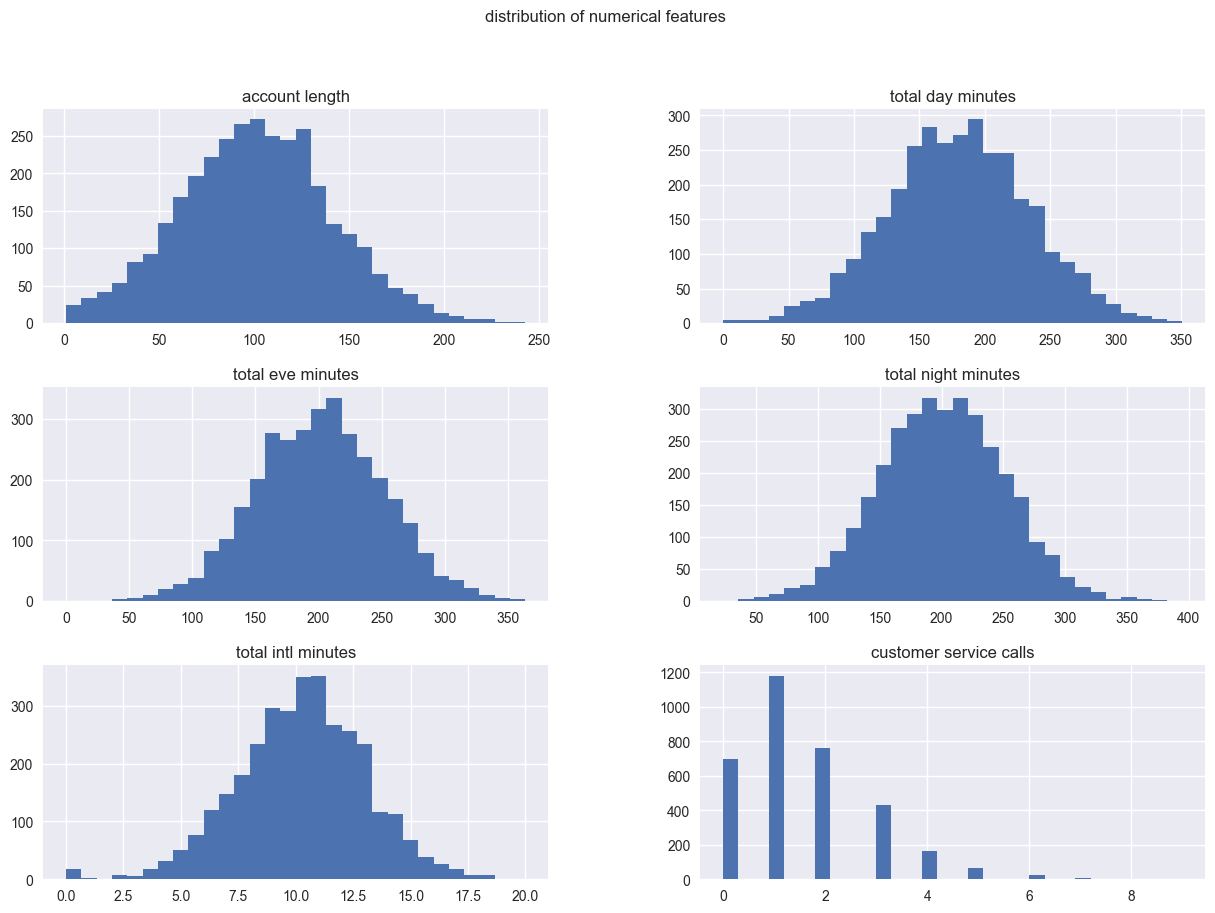

In [17]:
numerical_features = [
  "account length",
  "total day minutes",
  "total eve minutes",
  "total night minutes",
  "total intl minutes",
  "customer service calls"
]

df[numerical_features].hist(bins=30, figsize=(15,10))
plt.suptitle("distribution of numerical features")
plt.show()

#### Churn vs numerical features

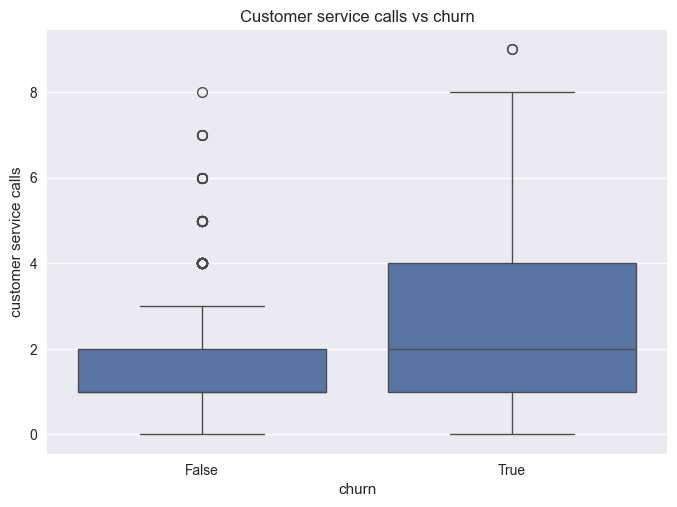

In [18]:
# customer service calls 

sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer service calls vs churn')
plt.show()

Customers who churn tend to make more customer service calls.
This is a strong indicator of dissatisfaction.

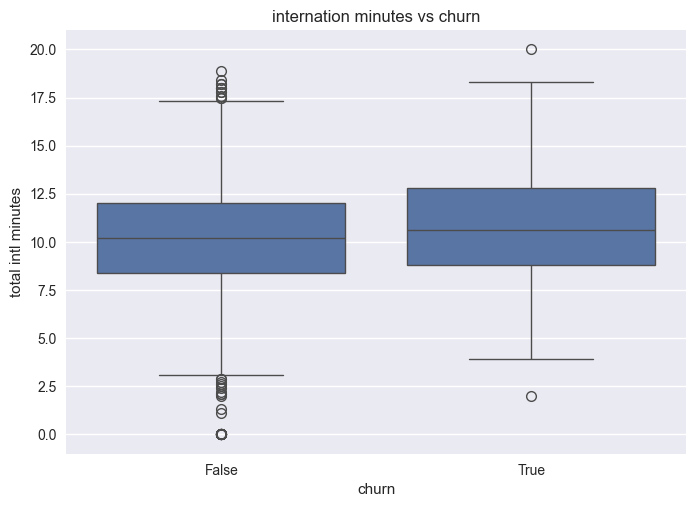

In [19]:
# international minutes 

sns.boxplot(x='churn', y='total intl minutes', data=df)
plt.title("internation minutes vs churn")
plt.show()

#### Correlation Analysis

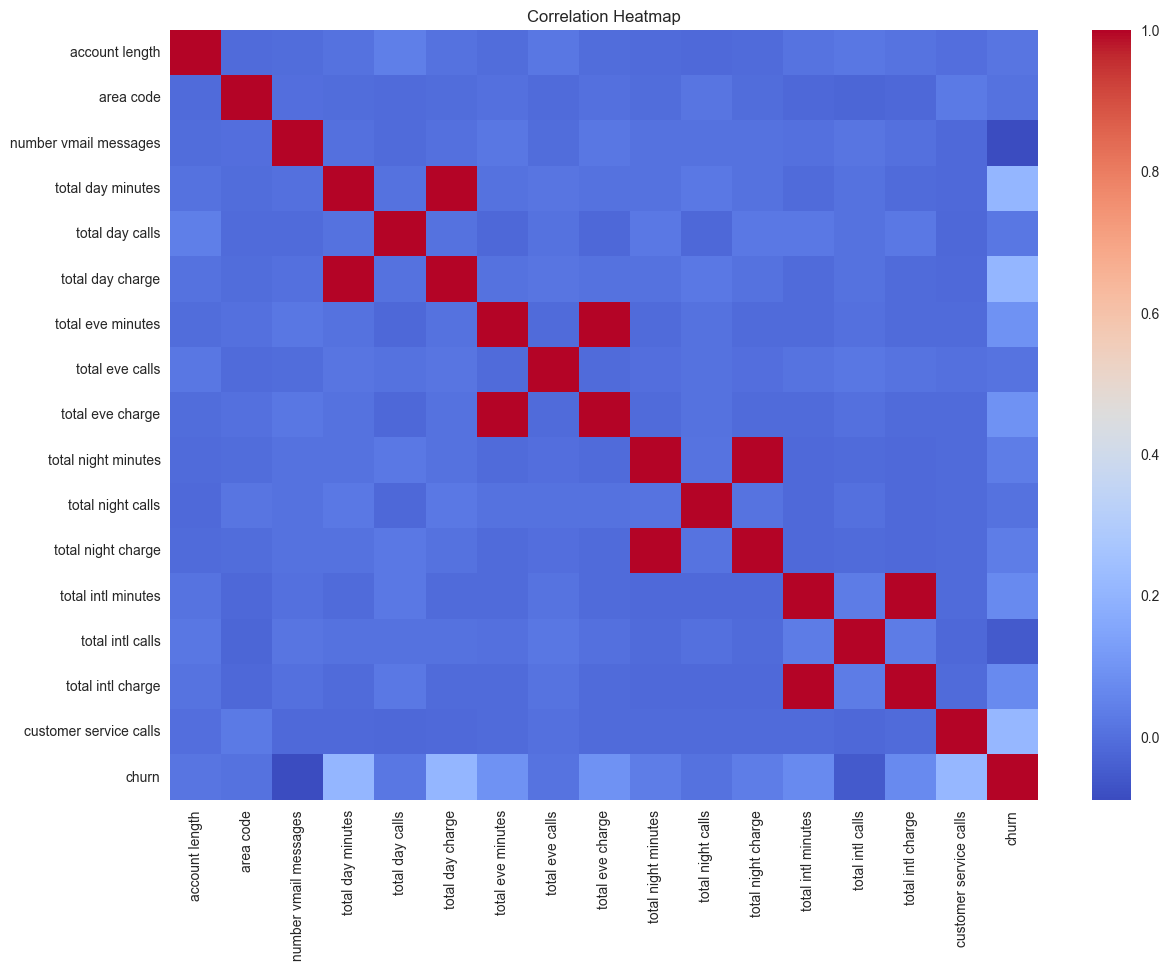

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Feature Redundancy and Decisions

#### Features to drop:
- phone number (identifier)
- highly correlated charge features

#### Features to encode:
- international plan (Yes/No)
- voice mail plan (Yes/No)

#### Target Variable:
- churn: convert into binary (True = 1, False = 0)

### Business Insights 

- Customers with international plans churn more frequently.
- High number of customer service calls is the strongest churn indicator.
- Heavy day-time users show increased churn risk.
- Longer-tenure customers are less likely to churn.

#### features that matter the most

- customer service calls 
- international plan
- total intl minutes
- total dat minutes
- voice mail plan

#### features that matter the least 

- area code 
- phone number
- total night calls
- total eve calls
- total night minutes
- total eve minutes
- account length

#### features that need to be dropped 

- phone number
- all charges (multicollinearity)
- area code 
- state